In [1]:
import plotly.express as px
import json
import pandas as pd
import kaleido

In [2]:
df = pd.read_csv('/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Real State/Idealista/idealista_search04142023_12:47.csv')

In [3]:
len(df)

700

In [4]:
df.describe()

,Unnamed: 0,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,distance,priceByArea,parkingSpace.parkingSpacePrice
count,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,8.000000
mean,24.500000,9.875379e+07,25.282857,198080.425714,94.002857,2.608571,1.645714,43.357761,-8.406866,2557.720000,2196.377143,24625.000000
std,14.441189,5.052416e+06,10.838520,59458.475380,28.934933,1.012616,0.537755,0.011339,0.012333,1100.940392,686.700907,10098.620839
min,0.000000,2.753168e+07,0.000000,48000.000000,35.000000,0.000000,0.000000,43.333520,-8.445984,18.000000,500.000000,10000.000000
25%,12.000000,9.814335e+07,18.000000,154747.500000,75.000000,2.000000,1.000000,43.350961,-8.415550,2148.250000,1734.500000,17250.000000
50%,24.500000,9.994204e+07,24.000000,196000.000000,92.000000,3.000000,2.000000,43.357108,-8.407477,2592.000000,2154.500000,25000.000000
75%,37.000000,1.007218e+08,32.000000,242050.000000,107.000000,3.000000,2.000000,43.364285,-8.398266,3033.750000,2589.250000,30500.000000
max,49.000000,1.011070e+08,71.000000,300000.000000,260.000000,8.000000,3.000000,43.384894,-8.336977,4998.000000,7500.000000,40000.000000


In [5]:
df.columns

Index(['Unnamed: 0', 'propertyCode', 'thumbnail', 'numPhotos', 'floor',
       'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'latitude', 'longitude', 'showAddress', 'url', 'distance',
       'description', 'hasVideo', 'status', 'newDevelopment', 'hasLift',
       'priceByArea', 'hasPlan', 'has3DTour', 'has360', 'hasStaging',
       'superTopHighlight', 'topNewDevelopment', 'detailedType.typology',
       'suggestedTexts.subtitle', 'suggestedTexts.title', 'externalReference',
       'parkingSpace.hasParkingSpace',
       'parkingSpace.isParkingSpaceIncludedInPrice', 'neighborhood',
       'detailedType.subTypology', 'labels', 'parkingSpace.parkingSpacePrice',
       'newDevelopmentFinished'],
      dtype='object')

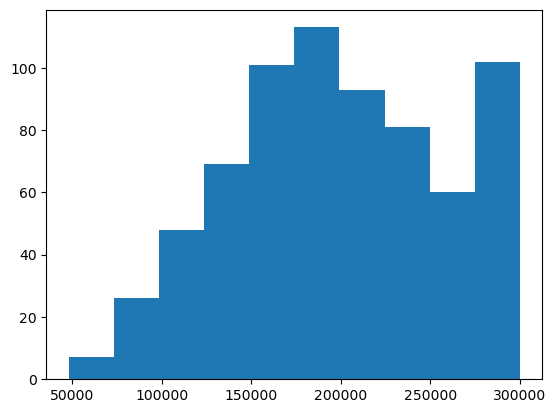

In [6]:
import matplotlib.pyplot as plt
plt.hist(df['price'])
plt.show()

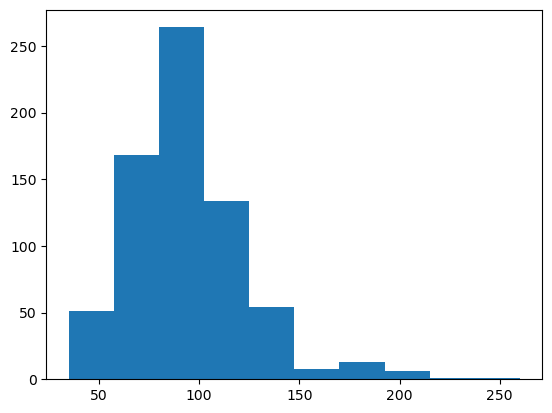

In [7]:
plt.hist(df['size'])
plt.show()

Text(0, 0.5, 'Size')

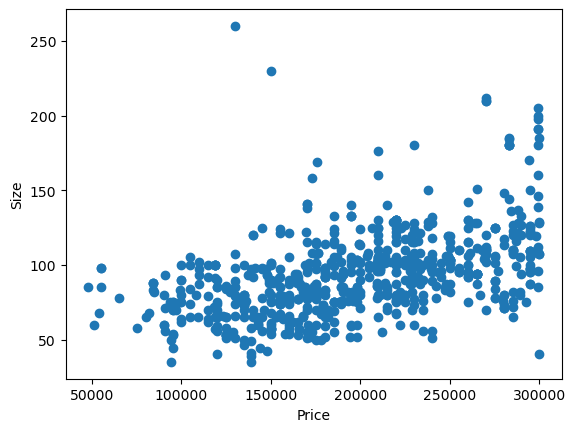

In [8]:
plt.scatter(df['price'], df['size'])
plt.xlabel('Price')
plt.ylabel('Size')

Text(0, 0.5, 'Rooms')

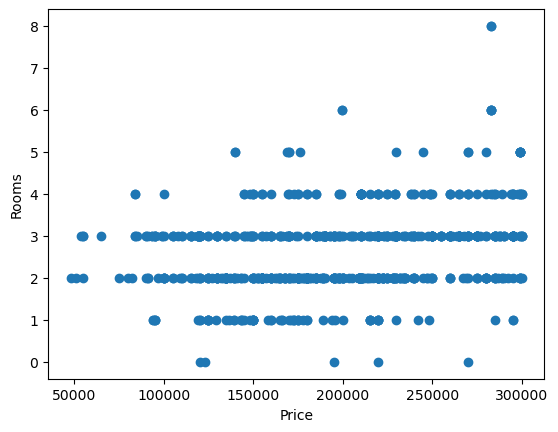

In [9]:
plt.scatter(df['price'], df['rooms'])
plt.xlabel('Price')
plt.ylabel('Rooms')

/Users/danielfiuzadosil/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


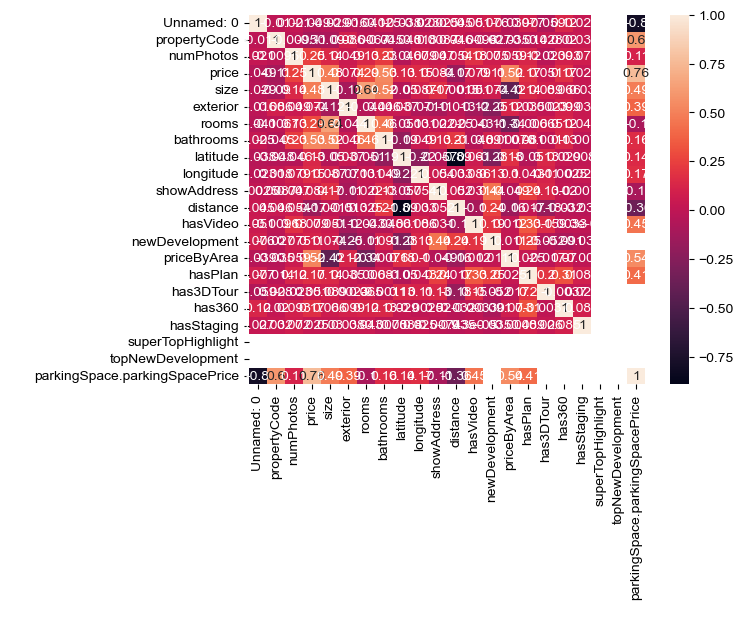

In [10]:
import seaborn as sn
sn.heatmap(df.corr(), annot=True)
sn.set(rc={'figure.figsize':(15,15)})
plt.show()


In [11]:

df.columns

Index(['Unnamed: 0', 'propertyCode', 'thumbnail', 'numPhotos', 'floor',
       'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'latitude', 'longitude', 'showAddress', 'url', 'distance',
       'description', 'hasVideo', 'status', 'newDevelopment', 'hasLift',
       'priceByArea', 'hasPlan', 'has3DTour', 'has360', 'hasStaging',
       'superTopHighlight', 'topNewDevelopment', 'detailedType.typology',
       'suggestedTexts.subtitle', 'suggestedTexts.title', 'externalReference',
       'parkingSpace.hasParkingSpace',
       'parkingSpace.isParkingSpaceIncludedInPrice', 'neighborhood',
       'detailedType.subTypology', 'labels', 'parkingSpace.parkingSpacePrice',
       'newDevelopmentFinished'],
      dtype='object')

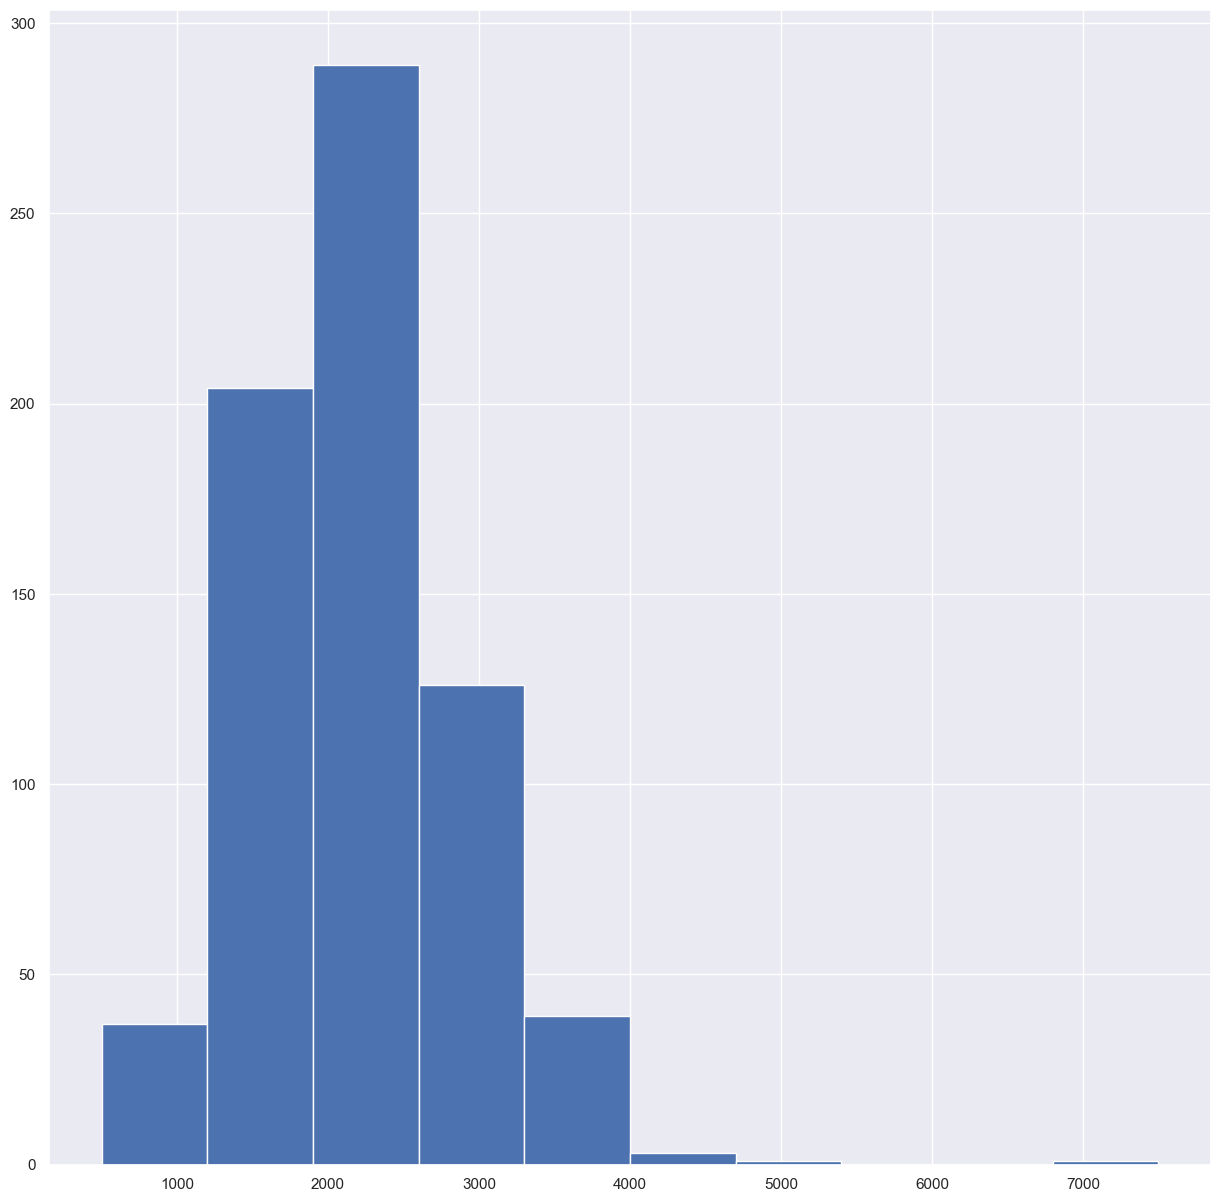

In [12]:
plt.hist(df['priceByArea'])
plt.show()

In [13]:
df_temp = df
# 
color_scale = [(0, 'blue'), (1,'red')]
fig = px.scatter_mapbox(df_temp, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="priceByArea", 
                        hover_data=["priceByArea","price","size","rooms","url"],
                        color="priceByArea",
                        color_continuous_scale=color_scale,
                        size="rooms",
                        zoom=13,
                        height=800,
                        width=800)
# fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_style="carto-positron") 
# fig.update_layout(mapbox_style="stamen-terrain")
# fig.update_layout(mapbox_style="satellite") -> Need Mapbox API
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [14]:
df.sort_values(by='priceByArea', ascending = True)
df_temp = df[df['priceByArea'] < 1400]
# 
color_scale = [(0, 'blue'), (1,'red')]
fig = px.scatter_mapbox(df_temp, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="priceByArea", 
                        hover_data=["priceByArea","price","size","rooms","url"],
                        color="price",
                        color_continuous_scale=color_scale,
                        size="priceByArea",
                        zoom=13,
                        height=800,
                        width=800)
# fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_style="carto-positron") 
# fig.update_layout(mapbox_style="stamen-terrain")
# fig.update_layout(mapbox_style="satellite") -> Need Mapbox API
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [15]:
df_temp = df[df['priceByArea'] < 1500]
# df_temp = df_temp[df_temp['price'] < 100000]

# 
color_scale = [(0, 'blue'), (1,'red')]
fig = px.scatter_mapbox(df_temp, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="price", 
                        hover_data=["priceByArea","price","size","rooms","url","propertyCode"],
                        color="priceByArea",
                        color_continuous_scale=color_scale,
                        size="price",
                        zoom=13,
                        height=800,
                        width=800)
# fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_style="carto-positron") 
# fig.update_layout(mapbox_style="stamen-terrain")
# fig.update_layout(mapbox_style="satellite") -> Need Mapbox API
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [16]:
fig.write_image("price_heatmap.png") 

In [17]:
df[df['district']=='Monte Alto - Zalaeta - Atocha']['priceByArea'].mean()

2418.695652173913

In [18]:
df[(df['priceByArea']<1300) & (df['district']!='Los Castros - Castrillón') & (df['district']!='Os Mallos')][['url', 'price', 'priceByArea', 'size','district']]

,url,price,priceByArea,size,district
14,https://www.idealista.com/inmueble/98726785/,55000.0,561.0,98.0,Elviña - A Zapateira
17,https://www.idealista.com/inmueble/98726184/,55000.0,561.0,98.0,Elviña - A Zapateira
32,https://www.idealista.com/inmueble/100767526/,115000.0,1250.0,92.0,Agra del Orzán - Ventorrillo
53,https://www.idealista.com/inmueble/100404150/,90000.0,1125.0,80.0,Agra del Orzán - Ventorrillo
56,https://www.idealista.com/inmueble/81650596/,210000.0,1193.0,176.0,Sagrada Familia
92,https://www.idealista.com/inmueble/100683328/,173000.0,1095.0,158.0,Agra del Orzán - Ventorrillo
150,https://www.idealista.com/inmueble/100076179/,93300.0,1244.0,75.0,Agra del Orzán - Ventorrillo
203,https://www.idealista.com/inmueble/98723606/,230000.0,1278.0,180.0,Perillo
204,https://www.idealista.com/inmueble/98775363/,80000.0,1231.0,65.0,Agra del Orzán - Ventorrillo
210,https://www.idealista.com/inmueble/100497236/,270000.0,1274.0,212.0,Monte Alto - Zalaeta - Atocha


In [19]:
df_temp[df_temp['size']>100]['url']

20      https://www.idealista.com/inmueble/99892520/
39     https://www.idealista.com/inmueble/100879026/
40      https://www.idealista.com/inmueble/99012373/
51      https://www.idealista.com/inmueble/98821510/
56      https://www.idealista.com/inmueble/81650596/
68      https://www.idealista.com/inmueble/99485074/
91     https://www.idealista.com/inmueble/100721743/
92     https://www.idealista.com/inmueble/100683328/
203     https://www.idealista.com/inmueble/98723606/
210    https://www.idealista.com/inmueble/100497236/
226     https://www.idealista.com/inmueble/98619825/
227     https://www.idealista.com/inmueble/98509549/
234    https://www.idealista.com/inmueble/100421926/
252     https://www.idealista.com/inmueble/99136230/
268     https://www.idealista.com/inmueble/99288002/
281     https://www.idealista.com/inmueble/99041337/
289    https://www.idealista.com/inmueble/100963958/
297    https://www.idealista.com/inmueble/100702873/
302    https://www.idealista.com/inmueble/1007

In [20]:
df[(df['price']==200000) & (df['priceByArea']==1961)]['url']

427    https://www.idealista.com/inmueble/97827864/
Name: url, dtype: object

In [21]:
df[df['price']==80000]['url']

204    https://www.idealista.com/inmueble/98775363/
Name: url, dtype: object

In [22]:
df[df['price']==80000].iloc[0]

Unnamed: 0                                                                                    4
propertyCode                                                                           98775363
thumbnail                                     https://img3.idealista.com/blur/WEB_LISTING/0/...
numPhotos                                                                                    21
floor                                                                                       NaN
price                                                                                   80000.0
propertyType                                                                             chalet
operation                                                                                  sale
size                                                                                       65.0
exterior                                                                                  False
rooms                                   

In [23]:
df[df['propertyCode']==99269703]['url']

Series([], Name: url, dtype: object)

In [24]:
df[df['price']<80000][['url','price','size','suggestedTexts.title']]

,url,price,size,suggestedTexts.title
5,https://www.idealista.com/inmueble/100763565/,55000.0,85.0,Ático
14,https://www.idealista.com/inmueble/98726785/,55000.0,98.0,"Chalet adosado en Calle o Portalón, 38"
17,https://www.idealista.com/inmueble/98726184/,55000.0,98.0,Chalet adosado en Calle o Portalon
351,https://www.idealista.com/inmueble/94451681/,48000.0,85.0,Chalet pareado en Lugar Lamadosa
386,https://www.idealista.com/inmueble/96835477/,51000.0,60.0,Piso en Calle Francisco Tettamancy
436,https://www.idealista.com/inmueble/99886395/,75000.0,58.0,Piso en Calle Bellavista
540,https://www.idealista.com/inmueble/100934534/,65000.0,78.0,Piso
605,https://www.idealista.com/inmueble/98889796/,53870.0,68.0,"Piso en Camino De La Iglesia, 3"
